### Proje Tanıtımı

#### Veri Seti Tanıtımı 

#### Attribute Tanıtımı

### Kütüphaneler 

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import glob
import seaborn as sns
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
import os

In [2]:
path ="dataset"
for names in sorted(glob.glob(path + "/*.csv")):
    print(names)

dataset\QCM10.csv
dataset\QCM12.csv
dataset\QCM3.csv
dataset\QCM6.csv
dataset\QCM7.csv


### veriseti okuma

In [3]:
qcm3 = pd.read_csv('dataset/QCM3.csv', sep = ';')
qcm6 = pd.read_csv('dataset/QCM6.csv', sep = ';')
qcm7 = pd.read_csv('dataset/QCM7.csv', sep = ';')
qcm10 = pd.read_csv('dataset/QCM10.csv', sep = ';')
qcm12 = pd.read_csv('dataset/QCM12.csv', sep = ';')

### veri seti şekilleri

In [4]:
print("Shape of qcm3: ", qcm3.shape)
print("Shape of qcm6: ", qcm6.shape)
print("Shape of qcm7: ", qcm7.shape)
print("Shape of qcm10: ", qcm10.shape)
print("Shape of qcm12: ", qcm12.shape)

Shape of qcm3:  (25, 15)
Shape of qcm6:  (25, 15)
Shape of qcm7:  (25, 15)
Shape of qcm10:  (25, 15)
Shape of qcm12:  (25, 15)


### veri setlerini birleştirme

In [5]:
# verileren veri setleri birleştirilerek tek bir veri seti haline getirilir.
dataset = pd.concat([qcm3, qcm6, qcm7, qcm10, qcm12])
print("Shape of dataset: ", dataset.shape)

Shape of dataset:  (125, 15)


In [6]:
#veri setinin ilk 5 elemanı
dataset.head()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,1,0,0,0,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,1,0,0,0,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,1,0,0,0,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,1,0,0,0,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,1,0,0,0,0


In [7]:
# veri setimizde Nan olan bir değer bulunmamaktadır
NumberofNan=0
for col in dataset.columns:
    NumberofNan = dataset[col].isna().sum()
    if  NumberofNan> 0:
        print(col, " -> ", NumberofNan)
print(NumberofNan)

0


### Correlation matrix

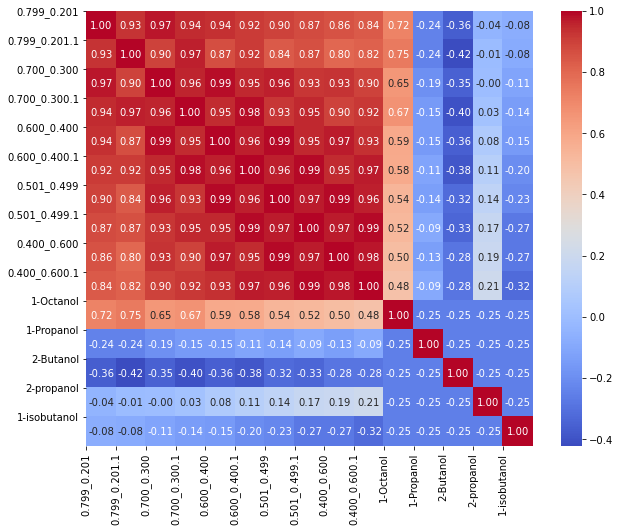

In [8]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [9]:
#Görselleştirme amacıyla "alkol" adlı bir sütun ekliyoruz. Bu sutünün değerlerini ise sınıf etiketleri ile dolduruyoruz
dataset.loc[dataset["1-Octanol"] == 1, 'alcohol'] = 0
dataset.loc[dataset["1-Propanol"] == 1, 'alcohol'] = 1
dataset.loc[dataset["2-Butanol"] == 1, 'alcohol'] = 2
dataset.loc[dataset["2-propanol"] == 1, 'alcohol'] = 3
dataset.loc[dataset["1-isobutanol"] == 1, 'alcohol'] = 4

In [10]:
# eklenilen alkol kolonu float tan int dönüştürldü
dataset['alcohol'] = dataset['alcohol'].astype(np.int64)

In [11]:
#datasetinin ilk 5 datası
dataset.head()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol,alcohol
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,1,0,0,0,0,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,1,0,0,0,0,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,1,0,0,0,0,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,1,0,0,0,0,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,1,0,0,0,0,0


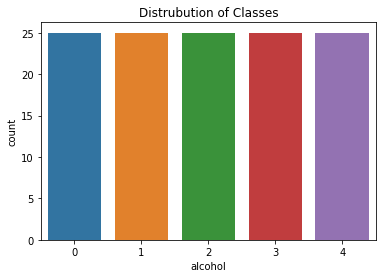

In [12]:
#şekilde de görüldüğü gibi sınıflarımız eşit dağılıma sahiptir.
sns.countplot(x = dataset["alcohol"],data = dataset)
plt.title("Distrubution of Classes")
plt.show()

### Veri dağılımlarını görselleştirme

D:\Anaconda\envs\KamilEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


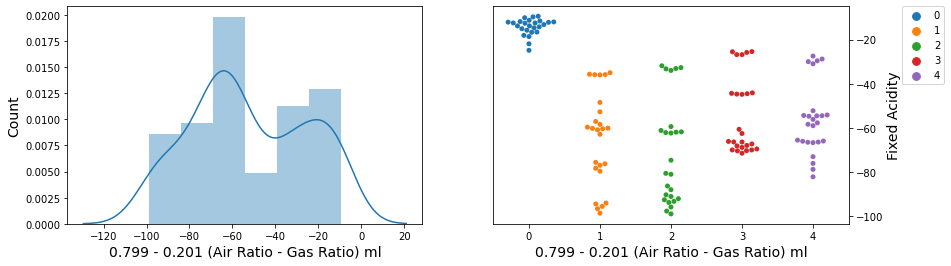

D:\Anaconda\envs\KamilEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


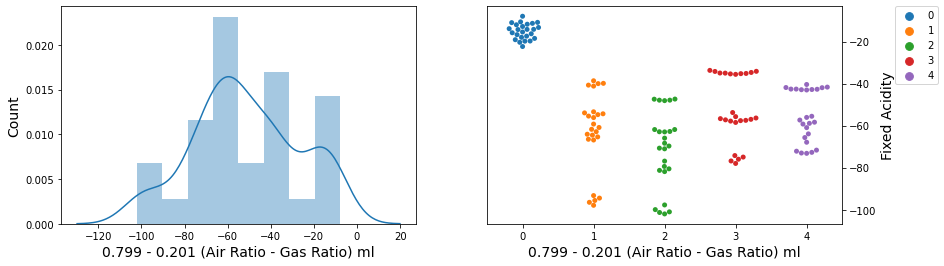

D:\Anaconda\envs\KamilEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


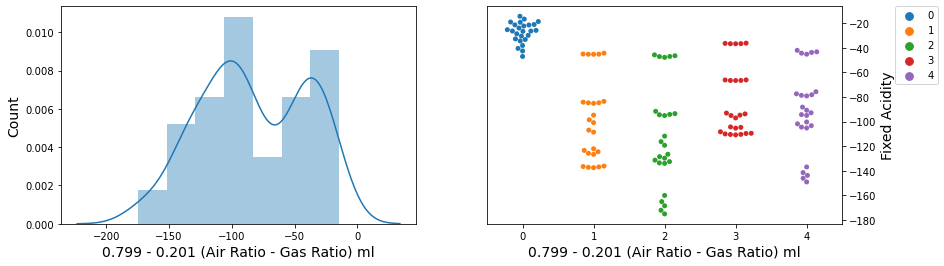

D:\Anaconda\envs\KamilEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


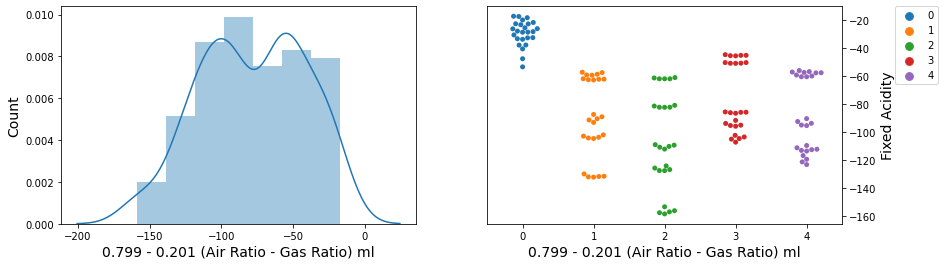

D:\Anaconda\envs\KamilEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


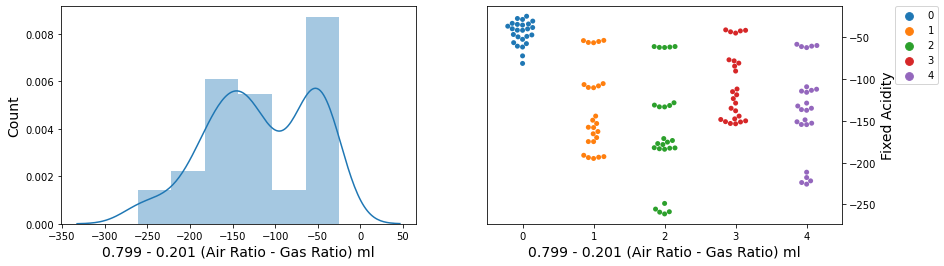

D:\Anaconda\envs\KamilEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


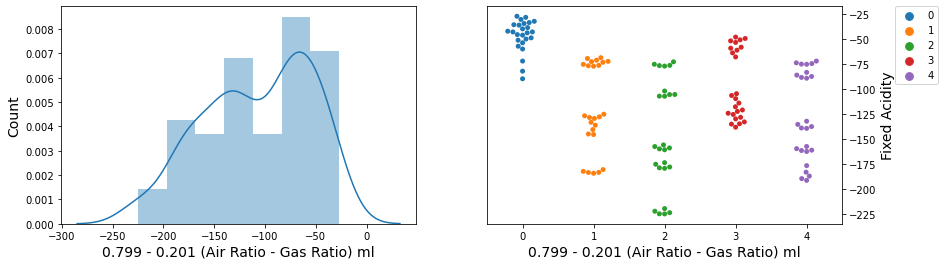

D:\Anaconda\envs\KamilEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


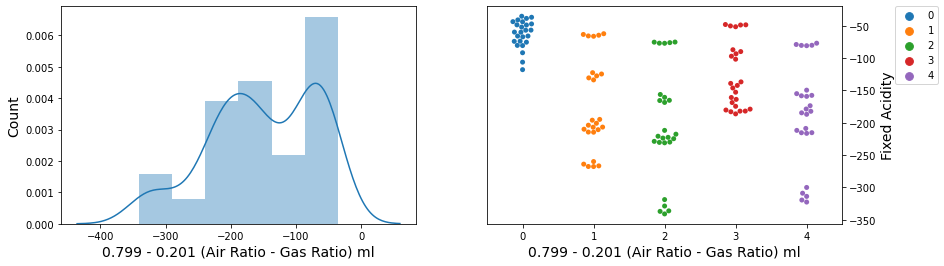

D:\Anaconda\envs\KamilEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


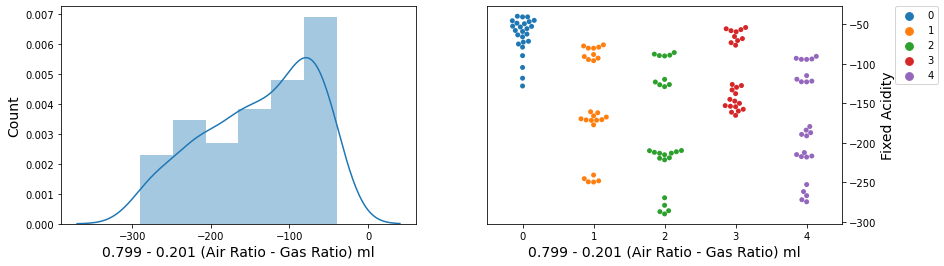

D:\Anaconda\envs\KamilEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


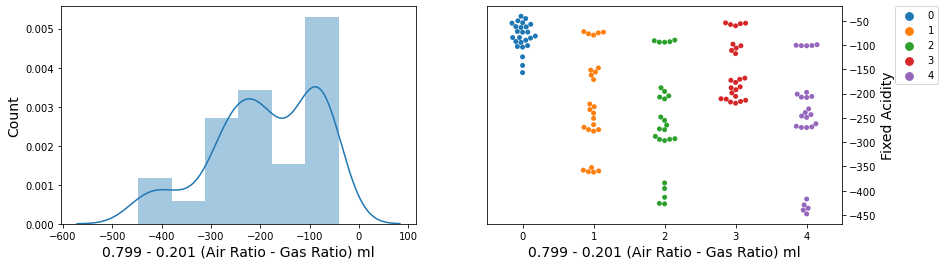

D:\Anaconda\envs\KamilEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


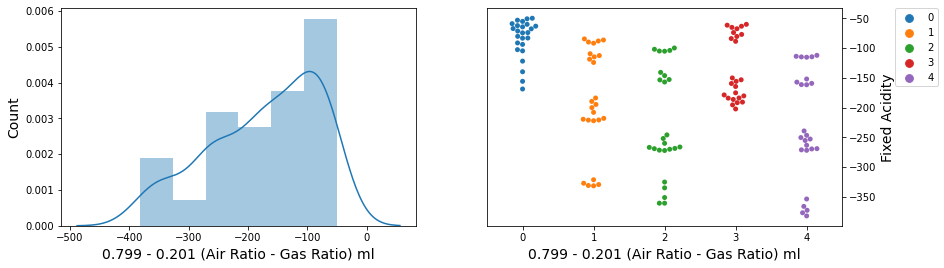

In [18]:
for col in dataset.columns[:-6]:   
    f, axes = plt.subplots(1,2,figsize=(14,4))

    sns.distplot(dataset[col], ax = axes[0])
    axes[0].set_xlabel('0.799 - 0.201 (Air Ratio - Gas Ratio) ml', fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].yaxis.tick_left()

    sns.swarmplot(x = 'alcohol', y =col, data = dataset, hue = 'alcohol',ax = axes[1])
    axes[1].set_xlabel('0.799 - 0.201 (Air Ratio - Gas Ratio) ml', fontsize=14)
    axes[1].set_ylabel('Fixed Acidity', fontsize=14)
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()
    axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
    plt.show()

### IQR ile aykırı değerleri tespit etmek

In [184]:
indexes = []
temp = dataset.copy()
for col in range(10):
    indis = dataset.columns[col]
    data = dataset[indis].sort_values()
    Q1 = np.percentile(data, 25)  
    Q2 = np.percentile(data, 50)  
    Q3 = np.percentile(data, 75)  

    IQR = Q3 - Q1 
    lower_IQR = Q1 - (1.5 * IQR)
    upper_IQR = Q3 + (1.5 * IQR)

    
    index = np.logical_or(data > upper_IQR, data < lower_IQR)
    #print(len(index))
    indexes.append(index)
indexes = np.array(indexes).reshape(10,125)  
    

Sonuçta da görüldüğü üzere datasetinde aykırı bir değer bulunmamaktadır.

In [185]:
np.count_nonzero(indexes) # indexes arayinde True ya da False değerleri tutulmuştur. Bunlar aykırı olup olmadığını tutar

0

### Datayı veri ve etiket olarak ayırma

In [186]:
## ANN model için (etiket datası[1,0,0,0,0] şeklinde)
X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, [10,11,12,13,14]].values 


In [187]:
print("X.shape:", X.shape ," y.shape",y.shape)

X.shape: (125, 10)  y.shape (125, 5)


### Datayı train ve test olarak ayırma(split)

In [188]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [189]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 10) (25, 10) (100, 5) (25, 5)


In [190]:
# Feature Scaling Normalize etme
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Classification with ANN 

In [191]:
def ANNclassification():
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the second hidden layer
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])  
    
    return classifier

In [192]:
#ANN model için sonuçlar
model = ANNclassification()
# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 100, epochs = 3000, verbose = 1)

Epoch 1/3000
1/1 [==============================] - 0s 194ms/step - loss: 1.6094 - accuracy: 0.1300 - val_loss: 1.6097 - val_accuracy: 0.1200
Epoch 2/3000
1/1 [==============================] - 0s 19ms/step - loss: 1.6094 - accuracy: 0.2200 - val_loss: 1.6099 - val_accuracy: 0.2000
Epoch 3/3000
1/1 [==============================] - 0s 22ms/step - loss: 1.6093 - accuracy: 0.2800 - val_loss: 1.6101 - val_accuracy: 0.2000
Epoch 4/3000
1/1 [==============================] - 0s 17ms/step - loss: 1.6092 - accuracy: 0.3500 - val_loss: 1.6104 - val_accuracy: 0.2000
Epoch 5/3000
1/1 [==============================] - 0s 21ms/step - loss: 1.6091 - accuracy: 0.3500 - val_loss: 1.6106 - val_accuracy: 0.2000
Epoch 6/3000
1/1 [==============================] - 0s 19ms/step - loss: 1.6090 - accuracy: 0.3500 - val_loss: 1.6108 - val_accuracy: 0.2000
Epoch 7/3000
1/1 [==============================] - 0s 21ms/step - loss: 1.6089 - accuracy: 0.3500 - val_loss: 1.6111 - val_accuracy: 0.2000
Epoch 8/3000

Epoch 59/3000
1/1 [==============================] - 0s 16ms/step - loss: 1.5731 - accuracy: 0.3500 - val_loss: 1.6059 - val_accuracy: 0.2000
Epoch 60/3000
1/1 [==============================] - 0s 16ms/step - loss: 1.5711 - accuracy: 0.3500 - val_loss: 1.6052 - val_accuracy: 0.2000
Epoch 61/3000
1/1 [==============================] - 0s 17ms/step - loss: 1.5691 - accuracy: 0.3500 - val_loss: 1.6045 - val_accuracy: 0.2000
Epoch 62/3000
1/1 [==============================] - 0s 26ms/step - loss: 1.5669 - accuracy: 0.3500 - val_loss: 1.6037 - val_accuracy: 0.2000
Epoch 63/3000
1/1 [==============================] - 0s 19ms/step - loss: 1.5647 - accuracy: 0.3500 - val_loss: 1.6029 - val_accuracy: 0.2000
Epoch 64/3000
1/1 [==============================] - 0s 23ms/step - loss: 1.5624 - accuracy: 0.3500 - val_loss: 1.6021 - val_accuracy: 0.2000
Epoch 65/3000
1/1 [==============================] - 0s 21ms/step - loss: 1.5601 - accuracy: 0.3500 - val_loss: 1.6012 - val_accuracy: 0.2000
Epoch 

1/1 [==============================] - 0s 17ms/step - loss: 1.2862 - accuracy: 0.3700 - val_loss: 1.4794 - val_accuracy: 0.2400
Epoch 174/3000
1/1 [==============================] - 0s 16ms/step - loss: 1.2851 - accuracy: 0.3600 - val_loss: 1.4788 - val_accuracy: 0.2400
Epoch 175/3000
1/1 [==============================] - 0s 17ms/step - loss: 1.2840 - accuracy: 0.3600 - val_loss: 1.4782 - val_accuracy: 0.2400
Epoch 176/3000
1/1 [==============================] - 0s 17ms/step - loss: 1.2829 - accuracy: 0.3600 - val_loss: 1.4776 - val_accuracy: 0.2400
Epoch 177/3000
1/1 [==============================] - 0s 22ms/step - loss: 1.2819 - accuracy: 0.3500 - val_loss: 1.4770 - val_accuracy: 0.2400
Epoch 178/3000
1/1 [==============================] - 0s 17ms/step - loss: 1.2808 - accuracy: 0.3500 - val_loss: 1.4764 - val_accuracy: 0.2000
Epoch 179/3000
1/1 [==============================] - 0s 16ms/step - loss: 1.2798 - accuracy: 0.3500 - val_loss: 1.4758 - val_accuracy: 0.2000
Epoch 180/3000

Epoch 287/3000
1/1 [==============================] - 0s 18ms/step - loss: 1.1717 - accuracy: 0.3900 - val_loss: 1.3756 - val_accuracy: 0.2000
Epoch 288/3000
1/1 [==============================] - 0s 16ms/step - loss: 1.1705 - accuracy: 0.3900 - val_loss: 1.3745 - val_accuracy: 0.2000
Epoch 289/3000
1/1 [==============================] - 0s 16ms/step - loss: 1.1693 - accuracy: 0.3900 - val_loss: 1.3734 - val_accuracy: 0.2000
Epoch 290/3000
1/1 [==============================] - 0s 17ms/step - loss: 1.1681 - accuracy: 0.4000 - val_loss: 1.3723 - val_accuracy: 0.2000
Epoch 291/3000
1/1 [==============================] - 0s 15ms/step - loss: 1.1669 - accuracy: 0.4000 - val_loss: 1.3711 - val_accuracy: 0.2000
Epoch 292/3000
1/1 [==============================] - 0s 18ms/step - loss: 1.1656 - accuracy: 0.4100 - val_loss: 1.3699 - val_accuracy: 0.2000
Epoch 293/3000
1/1 [==============================] - 0s 16ms/step - loss: 1.1643 - accuracy: 0.4100 - val_loss: 1.3684 - val_accuracy: 0.2000

Epoch 344/3000
1/1 [==============================] - 0s 18ms/step - loss: 1.0912 - accuracy: 0.4400 - val_loss: 1.2951 - val_accuracy: 0.4000
Epoch 345/3000
1/1 [==============================] - 0s 18ms/step - loss: 1.0901 - accuracy: 0.4400 - val_loss: 1.2942 - val_accuracy: 0.4000
Epoch 346/3000
1/1 [==============================] - 0s 16ms/step - loss: 1.0891 - accuracy: 0.4400 - val_loss: 1.2933 - val_accuracy: 0.4000
Epoch 347/3000
1/1 [==============================] - 0s 14ms/step - loss: 1.0880 - accuracy: 0.4400 - val_loss: 1.2924 - val_accuracy: 0.4000
Epoch 348/3000
1/1 [==============================] - 0s 16ms/step - loss: 1.0869 - accuracy: 0.4400 - val_loss: 1.2916 - val_accuracy: 0.4000
Epoch 349/3000
1/1 [==============================] - 0s 16ms/step - loss: 1.0859 - accuracy: 0.4400 - val_loss: 1.2907 - val_accuracy: 0.4000
Epoch 350/3000
1/1 [==============================] - 0s 15ms/step - loss: 1.0848 - accuracy: 0.4400 - val_loss: 1.2898 - val_accuracy: 0.4000

1/1 [==============================] - 0s 20ms/step - loss: 0.9979 - accuracy: 0.6200 - val_loss: 1.2129 - val_accuracy: 0.4800
Epoch 459/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.9970 - accuracy: 0.6200 - val_loss: 1.2121 - val_accuracy: 0.4800
Epoch 460/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.9961 - accuracy: 0.6300 - val_loss: 1.2113 - val_accuracy: 0.4800
Epoch 461/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.9952 - accuracy: 0.6300 - val_loss: 1.2105 - val_accuracy: 0.4800
Epoch 462/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.9943 - accuracy: 0.6300 - val_loss: 1.2097 - val_accuracy: 0.4800
Epoch 463/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.9934 - accuracy: 0.6300 - val_loss: 1.2089 - val_accuracy: 0.4800
Epoch 464/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.9925 - accuracy: 0.6300 - val_loss: 1.2081 - val_accuracy: 0.4800
Epoch 465/3000

1/1 [==============================] - 0s 18ms/step - loss: 0.8426 - accuracy: 0.6700 - val_loss: 1.0896 - val_accuracy: 0.4400
Epoch 573/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.8410 - accuracy: 0.6700 - val_loss: 1.0884 - val_accuracy: 0.4400
Epoch 574/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.8393 - accuracy: 0.6700 - val_loss: 1.0872 - val_accuracy: 0.4400
Epoch 575/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.8377 - accuracy: 0.6700 - val_loss: 1.0859 - val_accuracy: 0.4400
Epoch 576/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.8360 - accuracy: 0.6700 - val_loss: 1.0846 - val_accuracy: 0.4400
Epoch 577/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.8344 - accuracy: 0.6700 - val_loss: 1.0834 - val_accuracy: 0.4400
Epoch 578/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.8328 - accuracy: 0.6700 - val_loss: 1.0822 - val_accuracy: 0.4400
Epoch 579/3000

1/1 [==============================] - 0s 18ms/step - loss: 0.6661 - accuracy: 0.6900 - val_loss: 0.9145 - val_accuracy: 0.5200
Epoch 687/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.6647 - accuracy: 0.6900 - val_loss: 0.9130 - val_accuracy: 0.5200
Epoch 688/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.6632 - accuracy: 0.6900 - val_loss: 0.9117 - val_accuracy: 0.5200
Epoch 689/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.6618 - accuracy: 0.6900 - val_loss: 0.9105 - val_accuracy: 0.5200
Epoch 690/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.6604 - accuracy: 0.6900 - val_loss: 0.9093 - val_accuracy: 0.5200
Epoch 691/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.6590 - accuracy: 0.6900 - val_loss: 0.9082 - val_accuracy: 0.5200
Epoch 692/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.6576 - accuracy: 0.6900 - val_loss: 0.9071 - val_accuracy: 0.5200
Epoch 693/3000

1/1 [==============================] - 0s 16ms/step - loss: 0.5391 - accuracy: 0.7800 - val_loss: 0.7859 - val_accuracy: 0.5600
Epoch 800/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.5382 - accuracy: 0.7800 - val_loss: 0.7850 - val_accuracy: 0.5600
Epoch 801/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.5374 - accuracy: 0.7800 - val_loss: 0.7839 - val_accuracy: 0.5600
Epoch 802/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.5366 - accuracy: 0.7800 - val_loss: 0.7827 - val_accuracy: 0.5600
Epoch 803/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.5357 - accuracy: 0.7800 - val_loss: 0.7815 - val_accuracy: 0.5600
Epoch 804/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.5349 - accuracy: 0.7800 - val_loss: 0.7805 - val_accuracy: 0.5600
Epoch 805/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.5341 - accuracy: 0.7800 - val_loss: 0.7795 - val_accuracy: 0.5600
Epoch 806/3000

1/1 [==============================] - 0s 16ms/step - loss: 0.4947 - accuracy: 0.8000 - val_loss: 0.7278 - val_accuracy: 0.6400
Epoch 857/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.4940 - accuracy: 0.8000 - val_loss: 0.7265 - val_accuracy: 0.6400
Epoch 858/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.4932 - accuracy: 0.8000 - val_loss: 0.7252 - val_accuracy: 0.6400
Epoch 859/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.4925 - accuracy: 0.8000 - val_loss: 0.7238 - val_accuracy: 0.6400
Epoch 860/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.4917 - accuracy: 0.8000 - val_loss: 0.7226 - val_accuracy: 0.6400
Epoch 861/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.4910 - accuracy: 0.8000 - val_loss: 0.7214 - val_accuracy: 0.6400
Epoch 862/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.4903 - accuracy: 0.8100 - val_loss: 0.7202 - val_accuracy: 0.6400
Epoch 863/3000

1/1 [==============================] - 0s 15ms/step - loss: 0.4123 - accuracy: 0.8500 - val_loss: 0.5753 - val_accuracy: 0.8400
Epoch 970/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.4116 - accuracy: 0.8500 - val_loss: 0.5737 - val_accuracy: 0.8400
Epoch 971/3000
1/1 [==============================] - ETA: 0s - loss: 0.4109 - accuracy: 0.85 - 0s 15ms/step - loss: 0.4109 - accuracy: 0.8500 - val_loss: 0.5722 - val_accuracy: 0.8400
Epoch 972/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.4101 - accuracy: 0.8500 - val_loss: 0.5709 - val_accuracy: 0.8400
Epoch 973/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.4094 - accuracy: 0.8500 - val_loss: 0.5695 - val_accuracy: 0.8400
Epoch 974/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.4087 - accuracy: 0.8500 - val_loss: 0.5679 - val_accuracy: 0.8400
Epoch 975/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.4080 - accuracy: 0.8500 - val_loss: 0.

Epoch 1082/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.3440 - accuracy: 0.8500 - val_loss: 0.4341 - val_accuracy: 0.8400
Epoch 1083/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.3435 - accuracy: 0.8500 - val_loss: 0.4332 - val_accuracy: 0.8400
Epoch 1084/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.3430 - accuracy: 0.8500 - val_loss: 0.4324 - val_accuracy: 0.8400
Epoch 1085/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.3425 - accuracy: 0.8500 - val_loss: 0.4316 - val_accuracy: 0.8400
Epoch 1086/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.3421 - accuracy: 0.8500 - val_loss: 0.4308 - val_accuracy: 0.8400
Epoch 1087/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.3416 - accuracy: 0.8500 - val_loss: 0.4300 - val_accuracy: 0.8400
Epoch 1088/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.3411 - accuracy: 0.8500 - val_loss: 0.4292 - val_accuracy:

Epoch 1139/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.3185 - accuracy: 0.8500 - val_loss: 0.3880 - val_accuracy: 0.8400
Epoch 1140/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.3180 - accuracy: 0.8600 - val_loss: 0.3868 - val_accuracy: 0.8400
Epoch 1141/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.3176 - accuracy: 0.8600 - val_loss: 0.3860 - val_accuracy: 0.8400
Epoch 1142/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.3172 - accuracy: 0.8600 - val_loss: 0.3855 - val_accuracy: 0.8400
Epoch 1143/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.3167 - accuracy: 0.8600 - val_loss: 0.3852 - val_accuracy: 0.8400
Epoch 1144/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.3163 - accuracy: 0.8600 - val_loss: 0.3849 - val_accuracy: 0.8400
Epoch 1145/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.3159 - accuracy: 0.8700 - val_loss: 0.3844 - val_accuracy:

1/1 [==============================] - 0s 16ms/step - loss: 0.2719 - accuracy: 0.9100 - val_loss: 0.3157 - val_accuracy: 0.8400
Epoch 1252/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.2714 - accuracy: 0.9100 - val_loss: 0.3146 - val_accuracy: 0.8400
Epoch 1253/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.2709 - accuracy: 0.9100 - val_loss: 0.3136 - val_accuracy: 0.8400
Epoch 1254/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.2704 - accuracy: 0.9100 - val_loss: 0.3128 - val_accuracy: 0.8400
Epoch 1255/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.2699 - accuracy: 0.9100 - val_loss: 0.3122 - val_accuracy: 0.8400
Epoch 1256/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.2694 - accuracy: 0.9100 - val_loss: 0.3119 - val_accuracy: 0.8400
Epoch 1257/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.2689 - accuracy: 0.9100 - val_loss: 0.3116 - val_accuracy: 0.8400
Epoch 12

1/1 [==============================] - 0s 18ms/step - loss: 0.1958 - accuracy: 0.9700 - val_loss: 0.2417 - val_accuracy: 0.9200
Epoch 1363/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.1950 - accuracy: 0.9700 - val_loss: 0.2408 - val_accuracy: 0.9200
Epoch 1364/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.1942 - accuracy: 0.9700 - val_loss: 0.2400 - val_accuracy: 0.9200
Epoch 1365/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.1934 - accuracy: 0.9700 - val_loss: 0.2392 - val_accuracy: 0.9200
Epoch 1366/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.1927 - accuracy: 0.9700 - val_loss: 0.2386 - val_accuracy: 0.9200
Epoch 1367/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.1919 - accuracy: 0.9700 - val_loss: 0.2378 - val_accuracy: 0.9200
Epoch 1368/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.1911 - accuracy: 0.9700 - val_loss: 0.2369 - val_accuracy: 0.9200
Epoch 13

Epoch 1419/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.1513 - accuracy: 0.9900 - val_loss: 0.1948 - val_accuracy: 0.9600
Epoch 1420/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.1506 - accuracy: 0.9900 - val_loss: 0.1943 - val_accuracy: 0.9600
Epoch 1421/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.1498 - accuracy: 0.9900 - val_loss: 0.1941 - val_accuracy: 0.9600
Epoch 1422/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.1491 - accuracy: 0.9900 - val_loss: 0.1937 - val_accuracy: 0.9600
Epoch 1423/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.1484 - accuracy: 0.9900 - val_loss: 0.1930 - val_accuracy: 0.9600
Epoch 1424/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.1477 - accuracy: 0.9900 - val_loss: 0.1920 - val_accuracy: 0.9600
Epoch 1425/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.1469 - accuracy: 0.9900 - val_loss: 0.1908 - val_accuracy:

Epoch 1476/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.1093 - accuracy: 1.0000 - val_loss: 0.1384 - val_accuracy: 1.0000
Epoch 1477/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.1088 - accuracy: 1.0000 - val_loss: 0.1372 - val_accuracy: 1.0000
Epoch 1478/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.1081 - accuracy: 1.0000 - val_loss: 0.1362 - val_accuracy: 1.0000
Epoch 1479/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.1076 - accuracy: 1.0000 - val_loss: 0.1352 - val_accuracy: 1.0000
Epoch 1480/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.1070 - accuracy: 1.0000 - val_loss: 0.1344 - val_accuracy: 1.0000
Epoch 1481/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.1064 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 1.0000
Epoch 1482/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.1058 - accuracy: 1.0000 - val_loss: 0.1331 - val_accuracy:

1/1 [==============================] - 0s 16ms/step - loss: 0.0827 - accuracy: 1.0000 - val_loss: 0.1018 - val_accuracy: 1.0000
Epoch 1533/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0823 - accuracy: 1.0000 - val_loss: 0.1011 - val_accuracy: 1.0000
Epoch 1534/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.0819 - accuracy: 1.0000 - val_loss: 0.1006 - val_accuracy: 1.0000
Epoch 1535/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.0815 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy: 1.0000
Epoch 1536/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0812 - accuracy: 1.0000 - val_loss: 0.0998 - val_accuracy: 1.0000
Epoch 1537/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0808 - accuracy: 1.0000 - val_loss: 0.0992 - val_accuracy: 1.0000
Epoch 1538/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0804 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 1.0000
Epoch 15

Epoch 1645/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0524 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 1646/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0522 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 1.0000
Epoch 1647/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0520 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 1.0000
Epoch 1648/3000
1/1 [==============================] - ETA: 0s - loss: 0.0519 - accuracy: 1.00 - 0s 16ms/step - loss: 0.0519 - accuracy: 1.0000 - val_loss: 0.0655 - val_accuracy: 1.0000
Epoch 1649/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.0517 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 1.0000
Epoch 1650/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0515 - accuracy: 1.0000 - val_loss: 0.0649 - val_accuracy: 1.0000
Epoch 1651/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0513 - accuracy:

1/1 [==============================] - 0s 21ms/step - loss: 0.0435 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 1.0000
Epoch 1702/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0433 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 1.0000
Epoch 1703/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0432 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 1704/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 1705/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 1706/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 1707/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0427 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 1.0000
Epoch 17

1/1 [==============================] - 0s 16ms/step - loss: 0.0366 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 1759/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 1.0000
Epoch 1760/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 1761/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 1.0000 - val_loss: 0.0479 - val_accuracy: 1.0000
Epoch 1762/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.0478 - val_accuracy: 1.0000
Epoch 1763/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 1764/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0360 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 17

1/1 [==============================] - 0s 17ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 1.0000
Epoch 1871/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.0378 - val_accuracy: 1.0000
Epoch 1872/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0271 - accuracy: 1.0000 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 1873/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0271 - accuracy: 1.0000 - val_loss: 0.0376 - val_accuracy: 1.0000
Epoch 1874/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.0374 - val_accuracy: 1.0000
Epoch 1875/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 1876/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 18

1/1 [==============================] - 0s 17ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 1983/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 1984/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 1985/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 1986/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 1987/3000
1/1 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 1.00 - 0s 16ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 1988/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0208 - accuracy: 1.0000 - val_lo

Epoch 2039/3000
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 1.00 - 0s 18ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 2040/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 2041/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 2042/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 2043/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 2044/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 2045/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0185 - accuracy:

1/1 [==============================] - 0s 17ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 2096/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 2097/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 2098/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 2099/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 2100/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 2101/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 21

Epoch 2152/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 2153/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 2154/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 2155/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 2156/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 2157/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 2158/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy:

1/1 [==============================] - 0s 18ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 2266/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 2267/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 2268/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 2269/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 2270/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 2271/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 22

1/1 [==============================] - 0s 16ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 2379/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 2380/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 2381/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 2382/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 2383/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 2384/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 23

Epoch 2435/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 2436/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 2437/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 2438/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 2439/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 2440/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 2441/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy:

Epoch 2492/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 2493/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 2494/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 2495/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 2496/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 2497/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 2498/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy:

1/1 [==============================] - 0s 16ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 2606/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 2607/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 2608/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 2609/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 2610/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 2611/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 26

1/1 [==============================] - 0s 16ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2718/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2719/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2720/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2721/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2722/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2723/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 27

1/1 [==============================] - 0s 14ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 2830/3000
1/1 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 1.00 - 0s 17ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 2831/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 2832/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 2833/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 2834/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 2835/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0052 - accuracy: 1.0000 - val_lo

Epoch 2886/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 2887/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 2888/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 2889/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 2890/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 2891/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 2892/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy:

1/1 [==============================] - 0s 17ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 3000/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000


Acc ve Loss oranlarının Grafikleri

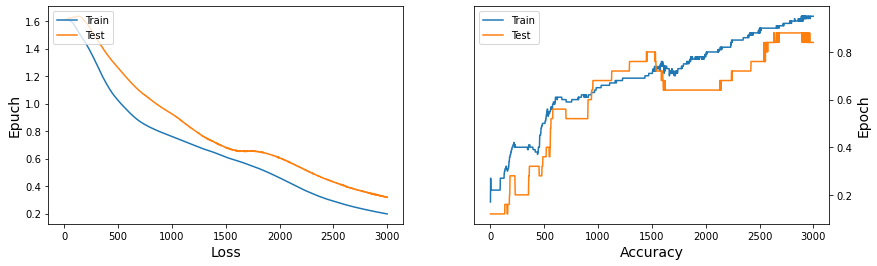

In [166]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epuch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

### Conf matrix

In [193]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred = model.predict_classes(X_test)
cm = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred)

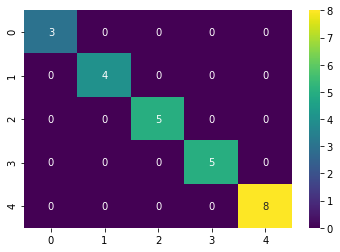

In [194]:
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.show()

### Datayı Train ve Test olarak ayırma

In [218]:
# etiketler 1 2 3 4 5 şeklinde. Class etiketi için alcohol kolonu kullanılmıştır.
x_train = dataset.drop(["1-Octanol","1-Propanol","2-Butanol","2-propanol","1-isobutanol","alcohol"],axis = 1)
y_train = dataset["alcohol"].values

In [219]:
x_train.head()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65


In [220]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [254]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


### Modeller

In [255]:
DecisionTreeClassifier = DecisionTreeClassifier()
GaussianNB = GaussianNB()
RandomForestClassifier = RandomForestClassifier()
KNeighborsClassifier = KNeighborsClassifier()
MLPClassifier = MLPClassifier()

models = [DecisionTreeClassifier,GaussianNB,RandomForestClassifier,KNeighborsClassifier,MLPClassifier]

In [256]:
# Başarı oranının yüksek çıkmasının sebebi verinin çok düzgün olmasıdır.
for model in (models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = np.where(y_test == y_pred,1,0).sum()/len(y_pred)
    print("acc for ",model," : ", acc)

acc for  DecisionTreeClassifier()  :  0.88
acc for  GaussianNB()  :  0.4
acc for  RandomForestClassifier()  :  1.0
acc for  KNeighborsClassifier()  :  0.76
acc for  MLPClassifier()  :  0.4


Classification için en başarılı sonucu ANN modeli ve Random Forest modeli vermiştir. Her iki model için de başarı oranı 1 dir.

### Regression

In [257]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

### Modeller

In [258]:
DecisionTreeRegressorModel = DecisionTreeRegressor()
LinearRegressionModel =LinearRegression()
RandomForestRegressorModel = RandomForestRegressor()
KNeighborsRegressorModel = KNeighborsRegressor()
MLPRegressorModel = MLPRegressor()

models = [DecisionTreeRegressorModel,LinearRegressionModel,RandomForestRegressorModel,
          KNeighborsRegressorModel,MLPRegressorModel]

In [260]:
for model in (models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = np.where(y_test == y_pred,1,0).sum()/len(y_pred)
    print("acc for ",model," : ", acc*100)

acc for  DecisionTreeRegressor()  :  96.0
acc for  LinearRegression()  :  0.0
acc for  RandomForestRegressor()  :  12.0
acc for  KNeighborsRegressor()  :  20.0
acc for  MLPRegressor()  :  0.0


Regression için en başarılı sonucu Decision Tree modeli vermiştir. Başarı oranı 0.96 dır.

### Clustering

In [474]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN, Birch

In [453]:
X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, [15]].values 

In [454]:
# Feature Scaling Datayı normalize etme
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)

### verinin dağılımı

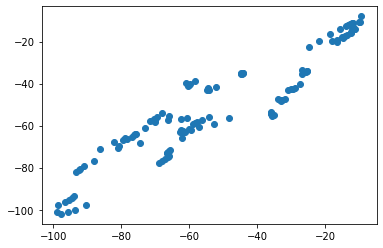

In [455]:
plt.scatter(X[:,0],X[:,1])

### KMeans 

In [478]:
for i in range(1,11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=5,
        max_iter=300,
        tol=1e-04, random_state=0
    )
    y_km = km.fit_predict(X_train)
    acc = findAcc(y_km,y)
    print("for ",i ,"acc ", acc)

for  1 acc  0.2
for  2 acc  0.08
for  3 acc  0.08
for  4 acc  0.24
for  5 acc  0.432
for  6 acc  0.224
for  7 acc  0.104
for  8 acc  0.296
for  9 acc  0.216
for  10 acc  0.184


### Spectral Clustering

In [491]:
for i in range(1,11):
    sp = SpectralClustering(
        n_clusters=i, 
        n_init=5,
        
         random_state=0
    )
    y_sp = sp.fit_predict(X_train)
    acc = findAcc(y_sp,y)
    print("for ",i ,"acc ", acc)

for  1 acc  0.2
for  2 acc  0.08
for  3 acc  0.04
for  4 acc  0.08
for  5 acc  0.16
for  6 acc  0.12
for  7 acc  0.08
for  8 acc  0.0
for  9 acc  0.016
for  10 acc  0.0


### Agglomerative Clustering

In [493]:
for i in range(1,11):
    ag = AgglomerativeClustering(
        n_clusters=i)
    
    y_ag = ag.fit_predict(X_train)
    acc = findAcc(y_ag,y)
    print("for ",i ,"acc ", acc)

for  1 acc  0.2
for  2 acc  0.08
for  3 acc  0.32
for  4 acc  0.16
for  5 acc  0.224
for  6 acc  0.2
for  7 acc  0.2
for  8 acc  0.08
for  9 acc  0.144
for  10 acc  0.16


### Birch 

In [495]:
for i in range(1,11):
    ag = Birch(
        n_clusters=i)
    
    y_ag = ag.fit_predict(X_train)
    acc = findAcc(y_ag,y)
    print("for ",i ,"acc ", acc)

for  1 acc  0.2
for  2 acc  0.08
for  3 acc  0.32
for  4 acc  0.08
for  5 acc  0.36
for  6 acc  0.16
for  7 acc  0.288
for  8 acc  0.2
for  9 acc  0.12
for  10 acc  0.12


Clustering modelleri için Accuracy hesaplama fonksiyonu

In [457]:
def findAcc(y_pred,y):
    count =0
    for i in range(len(y_pred)):
        if(y_pred[i]==y[i]):
            count +=1
    return count / len(y_pred)